In [1]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import networkx as nx
import collections

rc('animation', html='jshtml')


class Graphe:

    def __init__(self, liste_adjacence):
        self.G = liste_adjacence
        self.fig = plt.figure()
        plt.axis('off')
        self.gr = nx.Graph(self.G)
        pos = nx.spring_layout(self.gr)
        self.nodes = nx.draw_networkx_nodes(self.gr, pos, node_size=600)
        self.edges = nx.draw_networkx_edges(self.gr, pos)
        self.labels = nx.draw_networkx_labels(
            self.gr, pos, font_size=20, font_weight="bold")

    def draw_visites(self, visites):
        self.nodes.set(color=['r' if visites[s]
                       else 'b' for s in self.G.keys()])
        yield

    def parcours_profondeur(self, sommet_initial):
        visites = {sommet: False for sommet in self.G.keys()}
        pile = collections.deque()
        pile.append(sommet_initial)
        while pile:
            sommet = pile.pop()
            if not visites[sommet]:
                visites[sommet] = True
                yield from self.draw_visites(visites)
            for voisin in self.G[sommet]:
                if not visites[voisin]:
                    pile.append(voisin)

    def parcours_largeur(self, sommet_initial):
        visites = {sommet : False for sommet in self.G.keys()}
        file = collections.deque()
        file.append(sommet_initial)
        while file:
            sommet = file.popleft()
            if not visites[sommet]:
                visites[sommet] = True
                yield from self.draw_visites(visites)
            for voisin in self.G[sommet]:
                if not visites[voisin]:
                    file.append(voisin)

    def animate(self, i):
        pass

    def get_parcours_profondeur_animation(self, sommet_initial):
        ani = FuncAnimation(
            self.fig, self.animate, frames=lambda: self.parcours_profondeur(sommet_initial), save_count=len(self.G))
        plt.close()
        return ani

    def get_parcours_largeur_animation(self, sommet_initial):
        ani = FuncAnimation(
            self.fig, self.animate, frames=lambda: self.parcours_largeur(sommet_initial), save_count=len(self.G))
        plt.close()
        return ani


In [3]:
L = []
L.append("abc")
L.append(42)
L.append("def")
L

['abc', 42, 'def']

In [4]:
import collections

def parcours_profondeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}   # Aucun des sommets n'a été visité
    pile = collections.deque()
    pile.append(sommet_initial)                         # Empiler le sommet initial
    while pile:                                         # Tant que la pile n'est pas vide
        sommet = pile.pop()                             # Dépiler un sommet
        if not visites[sommet]:                         # Si le sommet n'est pas visité
            visites[sommet] = True                      # Marquer le sommet comme visité
            print("Sommet "+str(sommet)+" visité")
        for voisin in G[sommet]:                        # Empiler les voisins du sommet
            if not visites[voisin]:                     # s'ils n'ont pas été visités
                pile.append(voisin)

In [5]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}

In [6]:
Graphe(G).get_parcours_profondeur_animation(1)

In [7]:
parcours_profondeur(G, 1)

Sommet 1 visité
Sommet 4 visité
Sommet 2 visité
Sommet 3 visité
Sommet 5 visité


In [8]:
G = {1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7:[]}

In [9]:
Graphe(G).get_parcours_profondeur_animation(1)

In [10]:
parcours_profondeur(G, 1)

Sommet 1 visité
Sommet 3 visité
Sommet 7 visité
Sommet 6 visité
Sommet 2 visité
Sommet 5 visité
Sommet 4 visité


In [11]:
import collections

def parcours_largeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}   # Aucun des sommets n'a été visité
    file = collections.deque()
    file.append(sommet_initial)                         # Enfiler le sommet initial
    while file:                                         # Tant que la file n'est pas vide
        sommet = file.popleft()                         # Défiler un sommet
        if not visites[sommet]:                         # Si le sommet n'est pas visité
            visites[sommet] = True                      # Marquer le sommet comme visité
            print("Sommet "+str(sommet)+" visité")
        for voisin in G[sommet]:                        # Enfiler les voisins du sommet
            if not visites[voisin]:                     # s'ils n'ont pas été visités
                file.append(voisin)

In [12]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}

In [13]:
Graphe(G).get_parcours_largeur_animation(1)

In [14]:
parcours_largeur(G, 1)

Sommet 1 visité
Sommet 2 visité
Sommet 3 visité
Sommet 4 visité
Sommet 5 visité


In [15]:
G = {1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7:[]}

In [16]:
Graphe(G).get_parcours_largeur_animation(1)

In [17]:
parcours_largeur(G, 1)

Sommet 1 visité
Sommet 2 visité
Sommet 3 visité
Sommet 4 visité
Sommet 5 visité
Sommet 6 visité
Sommet 7 visité


In [18]:
import collections

def contient_cycle_profondeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    pile = collections.deque()
    pile.append((sommet_initial, None))
    while pile:
        sommet, parent = pile.pop()
        if not visites[sommet]:
            visites[sommet] = True
        for voisin in G[sommet]:
            if not visites[voisin]:
                pile.append((voisin, sommet))
            elif parent != voisin:
                return True
    return False

In [19]:
import collections

def contient_cycle_largeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    file = collections.deque()
    file.append((sommet_initial, None))
    while file:
        sommet, parent = file.popleft()
        if not visites[sommet]:
            visites[sommet] = True
        for voisin in G[sommet]:
            if not visites[voisin]:
                file.append((voisin, sommet))
            elif parent != voisin:
                return True
    return False

In [20]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}
#G = {1: [2], 2: [1]}

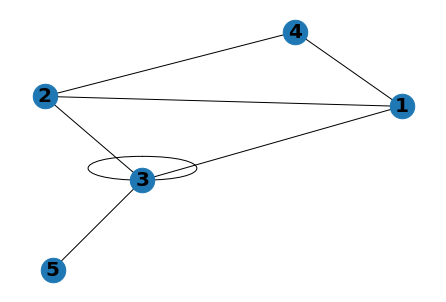

In [21]:
nx.draw_spring(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [22]:
contient_cycle_profondeur(G, 1), contient_cycle_largeur(G, 1)

(True, True)

In [23]:
G = {1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7:[]}

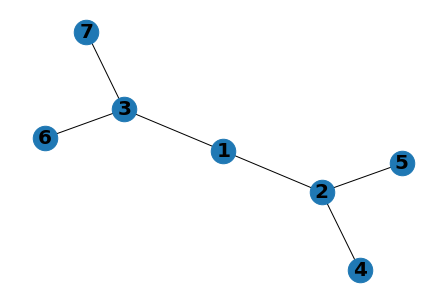

In [24]:
nx.draw_spring(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [25]:
contient_cycle_profondeur(G, 1), contient_cycle_largeur(G, 1)

(False, False)

In [26]:
import collections

def connexite_profondeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    pile = collections.deque()
    pile.append(sommet_initial)
    while pile:
        sommet = pile.pop()
        if not visites[sommet]:
            visites[sommet] = True
        for voisin in G[sommet]:
            if not visites[voisin]:
                pile.append(voisin)
    return False not in visites.values()

In [27]:
import collections

def connexite_largeur(G, sommet_initial):
    visites = {sommet : False for sommet in G.keys()}
    file = collections.deque()
    file.append(sommet_initial)
    while file:
        sommet = file.popleft()
        if not visites[sommet]:
            visites[sommet] = True
        for voisin in G[sommet]:
            if not visites[voisin]:
                file.append(voisin)
    return False not in visites.values()

In [28]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3, 5], 4: [1, 2], 5: [3]}

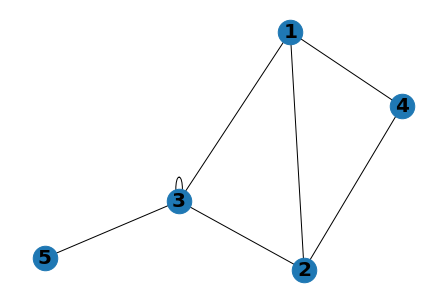

In [29]:
nx.draw_spring(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [30]:
connexite_profondeur(G, 1), connexite_largeur(G, 1)

(True, True)

In [31]:
G = {1: [2, 3, 4], 2: [1, 3, 4], 3: [1, 2, 3], 4: [1, 2], 5: [6, 7], 6 :[5], 7: [5]}

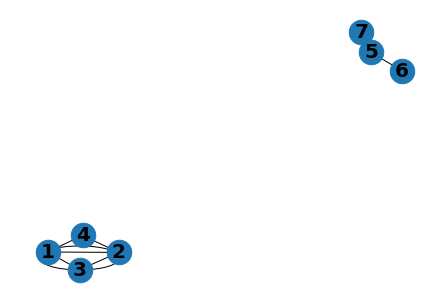

In [32]:
nx.draw_spring(nx.Graph(G), with_labels=True, font_weight="bold", font_size=20, node_size=600)

In [33]:
connexite_profondeur(G, 1), connexite_largeur(G, 1)

(False, False)